In [1]:
import tensorflow as tf
import numpy as np
import cv2
import os
import pandas as pd
from tqdm import tqdm
import pickle
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [2]:
def parseData(d):
    arr = d
    id_num = arr[0:10]
    dep = arr[10]
    mcq = arr[11:]
    return (id_num, dep, mcq)

In [3]:
with open("dataset_labels.pkl", "rb")  as f:
    data = pickle.load(f)

In [4]:
train_path = "dataset/train"
val_path  = "dataset/val"

train_labels = {}
val_labels = {}
for p in os.listdir(train_path):
    train_labels[p] = data[p]
    
for p in os.listdir(val_path):
    val_labels[p] = data[p]

In [5]:
len(val_labels)

600

In [6]:
column = []
idx = {}
char = ["A", "B", "C", "D"]
column.append("id")
column.append("label")
sr = 2
for i in range(10):
    for j in range(9):
        if i+1 == 10:
            ss = "id_0{}".format(j+1)
        else:
            ss = "id_{}{}".format(i+1,j+1)
        idx[ss] = sr
        sr+=1
        column.append(ss)
        
column.append("CSE")
column.append("MSJ")
column.append("BBA")
column.append("EEE")
idx["CSE"] = sr
sr+=1
idx["MSJ"] = sr
sr+=1
idx["BBA"] = sr
sr+=1
idx["EEE"] = sr
sr+=1


for i in range(100):
    for j in range(4):
        s = str(i+1)+str(char[j])
        idx[s] = sr
        sr+=1
        column.append(s)    

In [ ]:
idx

In [ ]:
column = np.array(column)
column

In [ ]:
column = np.array(column)
column.shape

In [ ]:
arr = ["", []]
for _ in range(494):
    arr.append(0)
print(arr)

d = []
cr = ["A", "B", "C", "D"]
for image_id, label in tqdm(val_labels.items()):
#     print(image_id, label)
    arr = ["", []]
    for _ in range(200):
        arr.append(0)
    k = arr
    k[0] = image_id
    k[1] = label
    c = 1
    for i in label:
        s = str(c) + cr[i-1]
        k[idx[s]] = 1
        c+=1
    d.append(k)

val_dataset = pd.DataFrame(d, columns=column)

In [ ]:
idx

In [7]:
d = []
cr = ["A", "B", "C", "D"]
dep_dic = {1:"CSE", 2:"MSJ", 3:"BBA", 4:"EEE"}
for image_id, label in tqdm(val_labels.items()):
    arr = ["", []]
    for _ in range(494):
        arr.append(0)
    k = arr
    k[0] = image_id
    k[1] = label
    c = 1
    id_no, dep, label = parseData(label)
    
    for cnt, id_n in enumerate(id_no):
        s = "id_{}{}".format(cnt+1, id_n)
        if cnt+1 == 10:
            s = "id_0{}".format(id_n)
            
        k[idx[s]] = 1
    
    dep_name = dep_dic[dep]
    k[idx[dep_name]] = 1
    for i in label:
        s = str(c) + cr[i-1]
        k[idx[s]] = 1
        c+=1
    d.append(k)
    
val_dataset = pd.DataFrame(d, columns=column)


d = []
cr = ["A", "B", "C", "D"]
dep_dic = {1:"CSE", 2:"MSJ", 3:"BBA", 4:"EEE"}
for image_id, label in tqdm(train_labels.items()):
    arr = ["", []]
    for _ in range(494):
        arr.append(0)
    k = arr
    k[0] = image_id
    k[1] = label
    c = 1
    id_no, dep, label = parseData(label)
    
    for cnt, id_n in enumerate(id_no):
        s = "id_{}{}".format(cnt+1, id_n)
        if cnt+1 == 10:
            s = "id_0{}".format(id_n)
            
        k[idx[s]] = 1
    
    dep_name = dep_dic[dep]
    k[idx[dep_name]] = 1
    for i in label:
        s = str(c) + cr[i-1]
        k[idx[s]] = 1
        c+=1
    d.append(k)
    
train_dataset = pd.DataFrame(d, columns=column)

100%|████████████████████████████████████████████████████████████████████████████| 2001/2001 [00:00<00:00, 9393.48it/s]


In [ ]:
val_dataset.to_csv("test.csv")

In [8]:
print(train_dataset.shape)
print(val_dataset.shape)

(2001, 496)
(600, 496)


d = []
cr = ["A", "B", "C", "D"]
for image_id, label in tqdm(val_labels.items()):
    arr = ["", []]
    for _ in range(200):
        arr.append(0)
    k = arr
    k[0] = image_id
    k[1] = label
    c = 1
    for i in label:
        s = str(c) + cr[i-1]
        k[idx[s]] = 1
        c+=1
    d.append(k)
    
val_dataset = pd.DataFrame(d, columns=column)
    
d = []
for image_id, label in tqdm(train_labels.items()):
    arr = ["", []]
    for _ in range(200):
        arr.append(0)
    k = arr
    k[0] = image_id
    k[1] = label
    c = 1
    for i in label:
        s = str(c) + cr[i-1]
        k[idx[s]] = 1
        c+=1
    d.append(k)
    
train_dataset = pd.DataFrame(d, columns=column)

In [ ]:
train_dataset = train_dataset.sample(frac=1).reset_index(drop=True)
val_dataset = val_dataset.sample(frac=1).reset_index(drop=True)

In [9]:
val_dataset.head()

,id,label,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,...,98C,98D,99A,99B,99C,99D,100A,100B,100C,100D
0,20011.png,"[1, 9, 2, 2, 4, 2, 7, 7, 6, 2, 1, 4, 2, 3, 3, ...",1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,20021.png,"[2, 8, 3, 2, 1, 6, 9, 8, 3, 1, 4, 4, 4, 2, 1, ...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,20031.png,"[6, 3, 2, 8, 3, 7, 5, 4, 7, 3, 1, 3, 3, 3, 1, ...",0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
3,20041.png,"[1, 8, 9, 5, 9, 1, 1, 1, 8, 7, 3, 1, 1, 4, 2, ...",1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,20051.png,"[7, 6, 8, 8, 4, 9, 5, 4, 9, 5, 3, 4, 1, 2, 4, ...",0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [11]:
img_width = 400
img_height = 500
img = cv2.imread("dataset/val/20011.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (img_width, img_height))
cv2.imshow("w", img)
cv2.waitKey(0)

-1

In [ ]:
img_width = 400
img_height = 400
train = []

print("Training set getting ready!")
for i in tqdm(range(train_dataset.shape[0])):
    path = "dataset/train/"+train_dataset["id"][i]
#     img = image.load_img(path, target_size=(img_width, img_height))
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (img_width, img_height))
    cv2.imshow(img)
    cv2.waitKey(0)
    break
    img = img / 255.0
    img = tf.expand_dims(img, axis=-1)
    train.append(img)
    

In [12]:
with tf.device("CPU"):
    img_width = 400
    img_height = 500
    
    
    print("Validation set getting ready!")
    val = []

    for i in tqdm(range(val_dataset.shape[0])):
        path = "dataset/val/"+val_dataset["id"][i]
    #     img = image.load_img(path, target_size=(img_width, img_height))
    #     img = image.img_to_array(img)
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (img_width, img_height))
        img = img / 255.0
    #     img = np.expand_dims(img, axis = 1)
        img = tf.expand_dims(img, axis=-1)
        val.append(img)

    val = np.array(val)
    
    
    train = []

    print("Training set getting ready!")
    for i in tqdm(range(train_dataset.shape[0])):
        path = "dataset/train/"+train_dataset["id"][i]
    #     img = image.load_img(path, target_size=(img_width, img_height))
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (img_width, img_height))
        img = img / 255.0
        img = tf.expand_dims(img, axis=-1)
        train.append(img)

    train = np.array(train)


    print(val.shape)
    print(train.shape)

  0%|▍                                                                                 | 3/600 [00:00<00:20, 29.13it/s]

Validation set getting ready!


  1%|▋                                                                               | 16/2001 [00:00<00:26, 76.19it/s]

Training set getting ready!


100%|██████████████████████████████████████████████████████████████████████████████| 2001/2001 [00:28<00:00, 70.28it/s]


(600, 500, 400, 1)
(2001, 500, 400, 1)


In [ ]:
train[0].shape

In [13]:
train_y = train_dataset.drop(['id', 'label'], axis = 1)
train_y = train_y.to_numpy()
print(train_y.shape)

val_y = val_dataset.drop(['id', 'label'], axis = 1)
val_y = val_y.to_numpy()
print(val_y.shape)

(2001, 494)
(600, 494)


In [16]:
dataset = {"train_x":train, "train_y":train_y, "val_x":val, "val_y":val_y}

In [17]:
with open("master_dataset_500_400.pkl", "wb") as file:
    pickle.dump(dataset, file)

In [4]:
with open("master_dataset(500_400).pkl", "rb") as file:
    dataset = pickle.load(file)

In [7]:
train_x, train_y, val_x, val_y = dataset["train_x"], dataset["train_y"], dataset["val_x"], dataset["val_y"]

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)

In [ ]:
train_x[0].shape

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation = 'relu', input_shape = train_x[0].shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64, 3, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(256, 3, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Conv2D(512, 3, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.6),
    
    tf.keras.layers.Conv2D(1024, 3, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.6),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(200, activation = 'sigmoid')
])

model.summary()

In [ ]:
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
model.fit(train_x, train_y, batch_size=2, epochs=50, validation_data=(val_x, val_y))

In [ ]:
columns = train_dataset.columns
columns = np.array(columns)
columns.shape

In [ ]:
img_width = 150
img_height = 150
img = cv2.imread("dataset/val/620.png")
copy_image = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (img_width, img_height))
img = img / 255.0

#     img = np.expand_dims(img, axis = 1)
img = tf.expand_dims(img, axis=-1)
img = np.expand_dims(img, axis = 0)
proba = model.predict(img)
proba = np.array(proba)
top_5 = np.argsort(proba[0])[:-6:-1]
print(top_5)
for i in range(1):
    k = sorted(columns[top_5 + 2])
    print(k, proba[0][top_5])
plt.imshow(copy_image)

In [ ]:
img = cv2.imread("dataset/train/2400.png")
img = cv2.resize(img, (150,150))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img / 255.0
img = tf.expand_dims(img, axis = 0)

In [ ]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    print(layer.name, layer.output.shape)

In [ ]:
model_first_conv = Model(inputs = model.inputs, outputs = model.layers[3].output)
feature_maps = model_first_conv.predict(img)
fig,ax = plt.subplots(2,8,figsize=(20,20))
ix = 0
for i in range(2):
    for j in range(8):
        img = feature_maps[0, :, :, ix]
        ax[i,j].set_xticklabels([])
        ax[i,j].set_yticklabels([])
        ax[i,j].set_aspect('equal')
        ax[i,j].imshow(img, cmap = "gray")
#         ax[i,j].get_xaxis().set_visible(False)
#         ax[i,j].get_yaxis().set_visible(False)
#         ax[i,j].
        ix+=1

In [4]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
resnet = tf.keras.applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= train_x[0].shape)
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout,Dense
from tensorflow.keras import Model
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(494, activation= 'sigmoid')(x)
model = Model(inputs = resnet.input, outputs = predictions)
model.compile(optimizer=optimizer, loss = 'binary_crossentropy')

In [ ]:
model.fit(train_x, train_y, batch_size=1, epochs = 50, validation_data=(val_x, val_y))

Epoch 1/50
2008/2008 [==============================] - 186s 90ms/step - loss: 0.5619 - val_loss: 0.5535
Epoch 2/50
2008/2008 [==============================] - 181s 90ms/step - loss: 0.5293 - val_loss: 0.5582
Epoch 3/50
2008/2008 [==============================] - 180s 90ms/step - loss: 0.5269 - val_loss: 0.5542
Epoch 4/50
2008/2008 [==============================] - 180s 90ms/step - loss: 0.5261 - val_loss: 0.5569
Epoch 5/50
2008/2008 [==============================] - 177s 88ms/step - loss: 0.5260 - val_loss: 0.5596
Epoch 6/50
2008/2008 [==============================] - 177s 88ms/step - loss: 0.5262 - val_loss: 0.5571
Epoch 7/50
2008/2008 [==============================] - 177s 88ms/step - loss: 0.5253 - val_loss: 0.5616
Epoch 8/50
2008/2008 [==============================] - 178s 88ms/step - loss: 0.5251 - val_loss: 0.5803
Epoch 9/50
2008/2008 [==============================] - 177s 88ms/step - loss: 0.5249 - val_loss: 0.5687
Epoch 10/50
2008/2008 [==============================] 

In [2]:
model = tf.keras.models.load_model("densenet121_450_epoch")

In [4]:
column = []
idx = {}
char = ["A", "B", "C", "D"]
column.append("id")
column.append("label")
sr = 2
for i in range(10):
    for j in range(9):
        if i+1 == 10:
            ss = "id_0{}".format(j+1)
        else:
            ss = "id_{}{}".format(i+1,j+1)
        idx[ss] = sr
        sr+=1
        column.append(ss)
        
column.append("CSE")
column.append("MSJ")
column.append("BBA")
column.append("EEE")
idx["CSE"] = sr
sr+=1
idx["MSJ"] = sr
sr+=1
idx["BBA"] = sr
sr+=1
idx["EEE"] = sr
sr+=1


for i in range(100):
    for j in range(4):
        s = str(i+1)+str(char[j])
        idx[s] = sr
        sr+=1
        column.append(s)      

In [5]:
idx

{'id_11': 2,
 'id_12': 3,
 'id_13': 4,
 'id_14': 5,
 'id_15': 6,
 'id_16': 7,
 'id_17': 8,
 'id_18': 9,
 'id_19': 10,
 'id_21': 11,
 'id_22': 12,
 'id_23': 13,
 'id_24': 14,
 'id_25': 15,
 'id_26': 16,
 'id_27': 17,
 'id_28': 18,
 'id_29': 19,
 'id_31': 20,
 'id_32': 21,
 'id_33': 22,
 'id_34': 23,
 'id_35': 24,
 'id_36': 25,
 'id_37': 26,
 'id_38': 27,
 'id_39': 28,
 'id_41': 29,
 'id_42': 30,
 'id_43': 31,
 'id_44': 32,
 'id_45': 33,
 'id_46': 34,
 'id_47': 35,
 'id_48': 36,
 'id_49': 37,
 'id_51': 38,
 'id_52': 39,
 'id_53': 40,
 'id_54': 41,
 'id_55': 42,
 'id_56': 43,
 'id_57': 44,
 'id_58': 45,
 'id_59': 46,
 'id_61': 47,
 'id_62': 48,
 'id_63': 49,
 'id_64': 50,
 'id_65': 51,
 'id_66': 52,
 'id_67': 53,
 'id_68': 54,
 'id_69': 55,
 'id_71': 56,
 'id_72': 57,
 'id_73': 58,
 'id_74': 59,
 'id_75': 60,
 'id_76': 61,
 'id_77': 62,
 'id_78': 63,
 'id_79': 64,
 'id_81': 65,
 'id_82': 66,
 'id_83': 67,
 'id_84': 68,
 'id_85': 69,
 'id_86': 70,
 'id_87': 71,
 'id_88': 72,
 'id_89': 73,


In [6]:
idx_inv = {}
for k, v in idx.items():
    idx_inv[v] = k

In [7]:
idx_inv

{2: 'id_11',
 3: 'id_12',
 4: 'id_13',
 5: 'id_14',
 6: 'id_15',
 7: 'id_16',
 8: 'id_17',
 9: 'id_18',
 10: 'id_19',
 11: 'id_21',
 12: 'id_22',
 13: 'id_23',
 14: 'id_24',
 15: 'id_25',
 16: 'id_26',
 17: 'id_27',
 18: 'id_28',
 19: 'id_29',
 20: 'id_31',
 21: 'id_32',
 22: 'id_33',
 23: 'id_34',
 24: 'id_35',
 25: 'id_36',
 26: 'id_37',
 27: 'id_38',
 28: 'id_39',
 29: 'id_41',
 30: 'id_42',
 31: 'id_43',
 32: 'id_44',
 33: 'id_45',
 34: 'id_46',
 35: 'id_47',
 36: 'id_48',
 37: 'id_49',
 38: 'id_51',
 39: 'id_52',
 40: 'id_53',
 41: 'id_54',
 42: 'id_55',
 43: 'id_56',
 44: 'id_57',
 45: 'id_58',
 46: 'id_59',
 47: 'id_61',
 48: 'id_62',
 49: 'id_63',
 50: 'id_64',
 51: 'id_65',
 52: 'id_66',
 53: 'id_67',
 54: 'id_68',
 55: 'id_69',
 56: 'id_71',
 57: 'id_72',
 58: 'id_73',
 59: 'id_74',
 60: 'id_75',
 61: 'id_76',
 62: 'id_77',
 63: 'id_78',
 64: 'id_79',
 65: 'id_81',
 66: 'id_82',
 67: 'id_83',
 68: 'id_84',
 69: 'id_85',
 70: 'id_86',
 71: 'id_87',
 72: 'id_88',
 73: 'id_89',


{'id_01': 0.02931072,
 'id_02': 0.16088599,
 'id_03': 0.07543214,
 'id_04': 0.071253605,
 'id_05': 0.059491184,
 'id_06': 0.04811796,
 'id_07': 0.06488981,
 'id_08': 0.18275161,
 'id_09': 0.06915741}

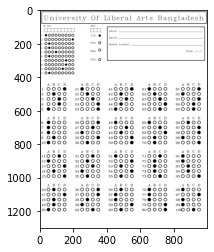

In [19]:
import cv2
img_width = 400
img_height = 500
img = cv2.imread("dataset/val/20011.png")
copy_image = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (img_width, img_height))
img = img / 255.0

#     img = np.expand_dims(img, axis = 1)
img = tf.expand_dims(img, axis=-1)
img = np.expand_dims(img, axis = 0)
proba = model.predict(img)
proba = np.array(proba)

# print(proba)
# top_5 = np.argsort(proba[0])[:-494:-1]
# top_5 = sorted(top_5)
idx_inv = {}
id_1 = {}
for k, v in idx.items():
    idx_inv[v] = k
for i, c in enumerate(proba[0]):
#     print(idx_inv[i+2])
    k = str(idx_inv[i+2])
    if k.startswith("id_0"):
        id_1[k] = c
plt.imshow(copy_image)

id_1

{'id_11': 0.23576778,
 'id_12': 0.041502524,
 'id_13': 0.073451795,
 'id_14': 0.09848712,
 'id_15': 0.014509967,
 'id_16': 0.23380591,
 'id_17': 0.060642514,
 'id_18': 0.02811734,
 'id_19': 0.08726167}

58 id_75
62 id_79
63 id_81
67 id_85
90 CSE
93 EEE
98 2A
101 2D
102 3A
104 3C
106 4A
108 4C
114 6A
118 7A
122 8A
125 8D
126 9A
130 10A
133 10D
139 12B
147 14B
152 15C
153 15D
154 16A
157 16D
158 17A
162 18A
168 19C
170 20A
172 20C
174 21A
177 21D
184 23C
185 23D
189 24D
191 25B
193 25D
197 26D
200 27C
202 28A
203 28B
209 29D
211 30B
216 31C
219 32B
226 34A
231 35B
234 36A
241 37D
243 38B
246 39A
253 40D
254 41A
258 42A
264 43C
274 46A
280 47C
283 48B
289 49D
293 50D
301 52D
303 53B
309 54D
311 55B
315 56B
316 56C
318 57A
319 57B
322 58A
326 59A
327 59B
330 60A
339 62B
340 62C
344 63C
349 64D
350 65A
354 66A
360 67C
362 68A
365 68D
367 69B
371 70B
376 71C
379 72B
383 73B
392 75C
394 76A
400 77C
402 78A
411 80B
414 81A
418 82A
422 83A
426 84A
435 86B
441 87D
444 88C
445 88D
446 89A
451 90B
454 91A
458 92A
464 93C
469 94D
474 96A
480 97C
483 98B
485 98D
488 99C
493 100D


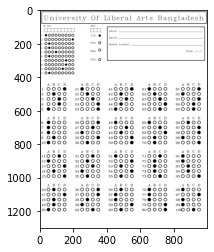

In [12]:
import cv2
img_width = 400
img_height = 500
img = cv2.imread("dataset/val/20011.png")
copy_image = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (img_width, img_height))
img = img / 255.0

#     img = np.expand_dims(img, axis = 1)
img = tf.expand_dims(img, axis=-1)
img = np.expand_dims(img, axis = 0)
proba = model.predict(img)
proba = np.array(proba)

proba
top_5 = np.argsort(proba[0])[:-112:-1]
top_5 = sorted(top_5)
# idx_inv = {}
# for k, v in idx.items():
#     idx_inv[v] = k

for i in top_5:
    print(i, idx_inv[i+2])

plt.imshow(copy_image)

In [8]:
train_x[0].shape

(500, 400, 1)

In [6]:
import matplotlib.pyplot as plt
img = train_[0]
img = cv2.resize(img, (400,500))
cv2.imshow("win", img)
cv2.waitKey(0)

NameError: name 'train' is not defined

In [32]:
train_y[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,